<h2>Letras Financeiras do Tesouro – LFT</h2>

<h3>Valor Nominal</h3>

Periodicidade de atualização : diária

Parâmetro de atualização: Taxa SELIC

Calculado pela fórmula VNA = VNb x C

<b>VNA</b> – Valor Nominal atualizado, calculado com 6 (seis) casas decimais sem arredondamento

<b>VNb</b> – Valor Nominal da data base, ou da data da última amortização ou incorporação, se houver, informado ou calculado com 6 (seis) casas decimais, sem arredondamento.


<b>C</b> – Fator resultante do produtório das taxas SELIC, referentes ao período da data base até a próxima data de atualização ou até a data de vencimento, calculado com 8 (oito) casas decimais com arredondamento, assim definido:


$$
  \prod_{k=1}^n \left(1 + TSelic_k\right),\ com\ k = 1, 2, ... n
$$

$TSelic_k$ = Taxa Selic, expressa ao dia, calculada com arredondamento na 8a (oitava) casa decimal, conforme segue:

$$
    TSelic_k = \left(\frac{Selic_k}{100}+1\right)^{\frac{1}{252}} - 1,\ com\ k = 1, 2, ... n
$$

$Selic_k$ – Taxa Selic,divulgada pelo Banco Central do Brasil, informada com 2 (duas) casas decimais.

In [83]:
import pandas as pd
from datetime import date

In [84]:
bcdata = pd.read_csv("bcdata.sgs.11.csv", sep=";", decimal=",")

In [85]:
bcdata.head()

,data,valor
0,04/06/1986,0.065041
1,05/06/1986,0.067397
2,06/06/1986,0.066740
3,09/06/1986,0.068247
4,10/06/1986,0.067041


In [86]:
bcdata.dtypes

data      object
valor    float64
dtype: object

In [87]:
bcdata["data"] = pd.to_datetime(bcdata["data"])

In [88]:
bcdata.head()

,data,valor
0,1986-04-06,0.065041
1,1986-05-06,0.067397
2,1986-06-06,0.066740
3,1986-09-06,0.068247
4,1986-10-06,0.067041


In [89]:
bcdata.dtypes

data     datetime64[ns]
valor           float64
dtype: object

In [90]:
bcdata = pd.read_csv("bcdata.sgs.11.csv", sep=";", decimal=",", parse_dates=["data"])

In [91]:
bcdata.head()

,data,valor
0,1986-04-06,0.065041
1,1986-05-06,0.067397
2,1986-06-06,0.066740
3,1986-09-06,0.068247
4,1986-10-06,0.067041


In [92]:
bcdata.dtypes

data     datetime64[ns]
valor           float64
dtype: object

In [93]:
bcdata = bcdata.loc[bcdata.data>='2002-01-01']

In [94]:
bcdata.head()

,data,valor
3892,2002-02-01,0.06922
3893,2002-03-01,0.06922
3894,2002-04-01,0.06922
3895,2002-07-01,0.06922
3896,2002-08-01,0.06922


In [95]:
import plotly.graph_objects as go

In [96]:
x_col = 'data'
y_col = 'valor'
df = bcdata

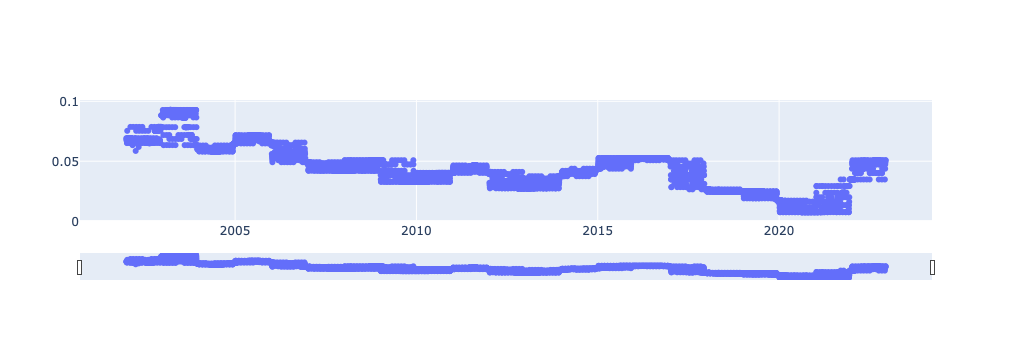

In [99]:
fig = go.Figure([go.Scatter(x=df[x_col], y=df[y_col], mode='markers')])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

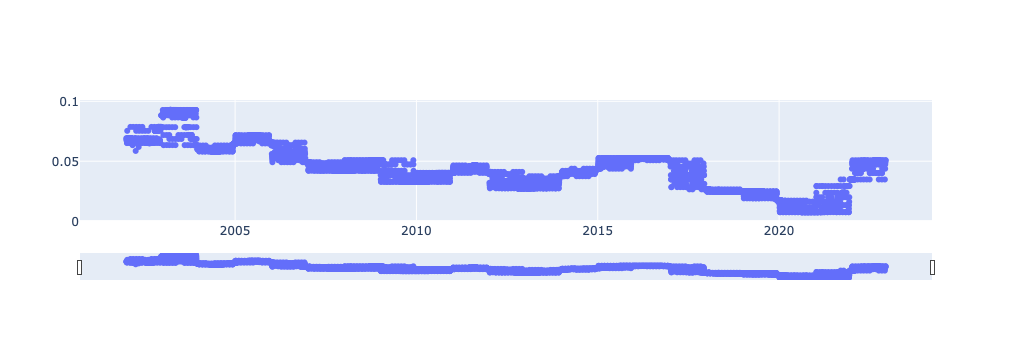

In [100]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='markers'))
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [113]:
selic = bcdata['valor'].to_numpy()

In [114]:
selic = ((1 + selic/100)**252 - 1)*100

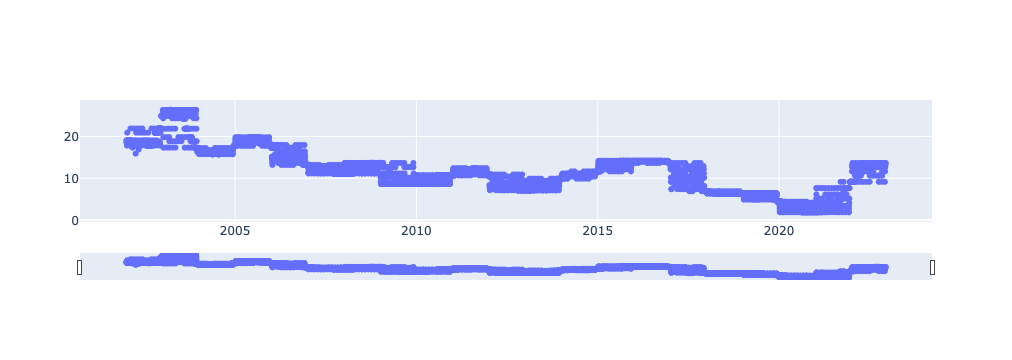

In [115]:
fig = go.Figure([go.Scatter(x=df['data'], y=selic, mode='markers')])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()